
# **Five-layer Convlutional NN**

### Add Tensorflow

In [ ]:
#load libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets
from tensorflow.keras import models
from tensorflow.keras import layers

###Preprocessing (Download and Normalization)

In [ ]:
(x_train, y_train), (x_test, y_test)=datasets.cifar10.load_data()

print(type(x_train))
print(x_train.shape)
print(y_train.shape)
print(y_train[0:10])

print(x_train[0].shape)

<class 'numpy.ndarray'>
(50000, 32, 32, 3)
(50000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
(32, 32, 3)


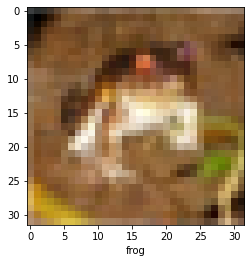

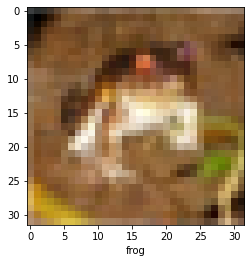

In [ ]:
categories = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.xlabel(categories[y_train[0][0]])
plt.show()
#Normalization
#(0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)
x_train, x_test = x_train /255.0, x_test /255.0

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.xlabel(categories[y_train[0][0]])
plt.show()





## CNN 

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(128, (3,3),padding='SAME', strides=(1, 1),activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(.2))
model.add(layers.Conv2D(128, (3,3), strides=(1, 1),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(.2))
model.add(layers.Conv2D(32, (3, 3),padding='SAME', strides=(1, 1),activation='relu'))
model.add(layers.Dropout(.1))
model.add(layers.Conv2D(32, (3, 3),padding='VALID', strides=(1, 1),activation='relu'))
model.add(layers.Dropout(.1))
model.add(layers.Conv2D(32, (2, 2),padding='VALID', strides=(1, 1),activation='relu'))
model.add(layers.Dropout(.1))



In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          3

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          3

In [ ]:
from keras.optimizers import Adam
from keras.optimizers import SGD
#opt =SGD(lr=0.01, momentum=0.9)
opt =Adam(learning_rate=0.001, beta_1=0.8, beta_2=0.999, epsilon=1e-07)
model.compile(optimizer=opt,
              steps_per_execution = 128,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=15, 
                    validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8165 - accuracy: 0.3198 - val_loss: 1.2811 - val_accuracy: 0.5393
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2734 - accuracy: 0.5398 - val_loss: 1.0948 - val_accuracy: 0.6070
Epoch 3/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1184 - accuracy: 0.6013 - val_loss: 1.0622 - val_accuracy: 0.6273
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0264 - accuracy: 0.6343 - val_loss: 0.9686 - val_accuracy: 0.6595
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9553 - accuracy: 0.6615 - val_loss: 0.9322 - val_accuracy: 0.6675
Epoch 6/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9034 - accuracy: 0.6777 - val_loss: 0.8599 - val_accuracy: 0.7022
Epoch 7/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8620 - accuracy: 0.6950 - val_loss: 0.8353 - val_accuracy

313/313 - 1s - loss: 0.7509 - accuracy: 0.7439


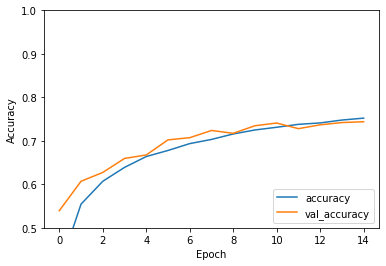

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)